Updated Working Directory: /home/lureust/telco_churn_analysis
SeniorCitizen                              int64
tenure                                   float64
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                      int64
gender_Male                                 bool
Partner_Yes                                 bool
Dependents_Yes                              bool
PhoneService_Yes                            bool
MultipleLines_No phone service              bool
MultipleLines_Yes                           bool
InternetService_Fiber optic                 bool
InternetService_No                          bool
OnlineSecurity_No internet service          bool
OnlineSecurity_Yes                          bool
OnlineBackup_No internet service            bool
OnlineBackup_Yes                            bool
DeviceProtection_No internet service        bool
DeviceProtection_Yes                        bool
TechSup

/tmp/ipykernel_112151/1339177373.py:23: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')  # or df = df.dropna()


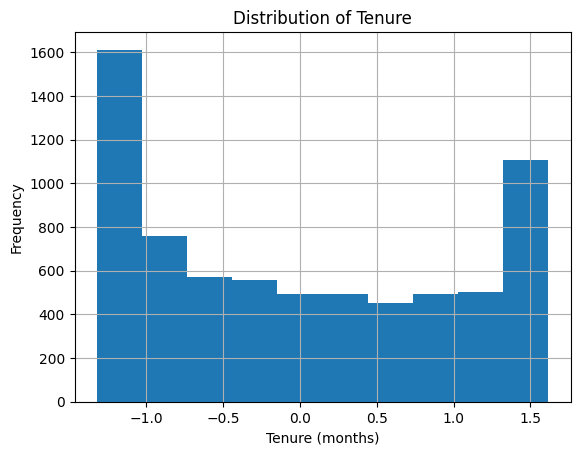

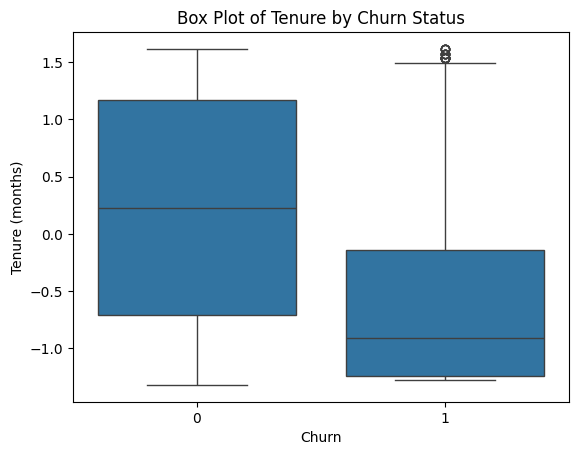

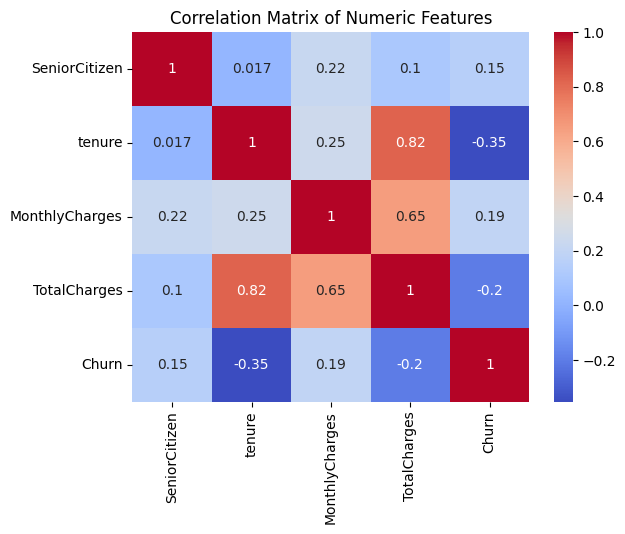

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1036
           1       1.00      1.00      1.00       373

    accuracy                           1.00      1409
   macro avg       1.00      1.00      1.00      1409
weighted avg       1.00      1.00      1.00      1409

[[1036    0]
 [   0  373]]
Cross-validation scores: [1. 1. 1. 1. 1.]
Mean cross-validation score: 1.0


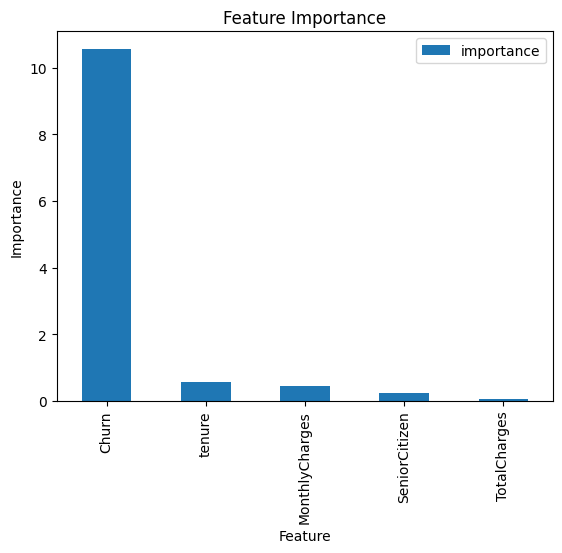

Recommendations based on churn analysis:
1. Focus on retaining customers with a tenure less than 6 months.
2. Improve customer service for high-risk segments.
3. Offer loyalty programs for long-term customers.


In [24]:
import os

# Change working directory to the project directory
os.chdir('/home/lureust/telco_churn_analysis') #sets current working directory
print("Updated Working Directory:", os.getcwd()) #prints current working directory to view change (debugging steps)

# Import necessary libraries
import pandas as pd #data manipulation and analysis
import numpy as np #numerical computations
import matplotlib.pyplot as plt #plotting graphs
import seaborn as sns #statistical data visualization
from sklearn.model_selection import train_test_split, cross_val_score #splitting the data into training and test sets ; cross-validation
from sklearn.linear_model import LogisticRegression #logistic regression modeling 
from sklearn.metrics import classification_report, confusion_matrix #detalied classification report ; confusion matrix
from sklearn.preprocessing import StandardScaler #standardizing features by reomving mean and scaling to unit variance 

# Data Collection
df = pd.read_csv('telco_customer_churn.csv.csv')
df.head()

# Data Preprocessing
df.isnull().sum()
df = df.fillna(method='ffill')  # or df = df.dropna() #displays the first few rows of the DataFrame to check if the data has been loaded correctly.

# Convert TotalCharges to numeric and handle potential non-numeric values
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df = df.fillna({'TotalCharges': df['TotalCharges'].mean()})

# Drop the non-numeric customerID column
df = df.drop(columns=['customerID'])

# Feature Engineering
# Encoding categorical variables
df = pd.get_dummies(df, columns=['gender', 'Partner', 'Dependents', 'PhoneService', 
                                 'MultipleLines', 'InternetService', 'OnlineSecurity', 
                                 'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                                 'StreamingTV', 'StreamingMovies', 'Contract', 
                                 'PaperlessBilling', 'PaymentMethod'], drop_first=True)

# Converting 'SeniorCitizen' and 'Churn' to integer
df['SeniorCitizen'] = df['SeniorCitizen'].astype(int)
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Normalizing numerical features
scaler = StandardScaler()
df[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(df[['tenure', 'MonthlyCharges', 'TotalCharges']])

# Ensure all features are numeric
print(df.dtypes)  # Inspect data types
numeric_cols = df.select_dtypes(include=[np.number]).columns  # Select only numeric columns
X = df[numeric_cols].astype(float)
y = df['Churn']

# Exploratory Data Analysis (EDA)
df['tenure'].hist()
plt.title('Distribution of Tenure')
plt.xlabel('Tenure (months)')
plt.ylabel('Frequency')
plt.show()

sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Box Plot of Tenure by Churn Status')
plt.xlabel('Churn')
plt.ylabel('Tenure (months)')
plt.show()

# Generate correlation matrix with numeric columns only
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

# Churn Analysis
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Model Evaluation
scores = cross_val_score(model, X, y, cv=5)
print(f'Cross-validation scores: {scores}')
print(f'Mean cross-validation score: {scores.mean()}')

# Model Interpretation
importance = np.abs(model.coef_[0])
feature_names = X.columns
feature_importance = pd.DataFrame({'feature': feature_names, 'importance': importance})
feature_importance.sort_values(by='importance', ascending=False).plot(kind='bar', x='feature', y='importance')
plt.title('Feature Importance')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

# Actionable Insights
print("Recommendations based on churn analysis:")
print("1. Focus on retaining customers with a tenure less than 6 months.")
print("2. Improve customer service for high-risk segments.")
print("3. Offer loyalty programs for long-term customers.")


Updated Working Directory: /home/lureust/telco_churn_analysis
Churn
0    5174
1    1869
Name: count, dtype: int64


/tmp/ipykernel_112151/3417825659.py:23: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')  # or df = df.dropna()


              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1035
           1       0.50      0.78      0.61       374

    accuracy                           0.74      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.80      0.74      0.75      1409

[[747 288]
 [ 81 293]]
Cross-validation scores: [0.74875798 0.75656494 0.73882186 0.7421875  0.74857955]
Mean cross-validation score: 0.7469823657977934


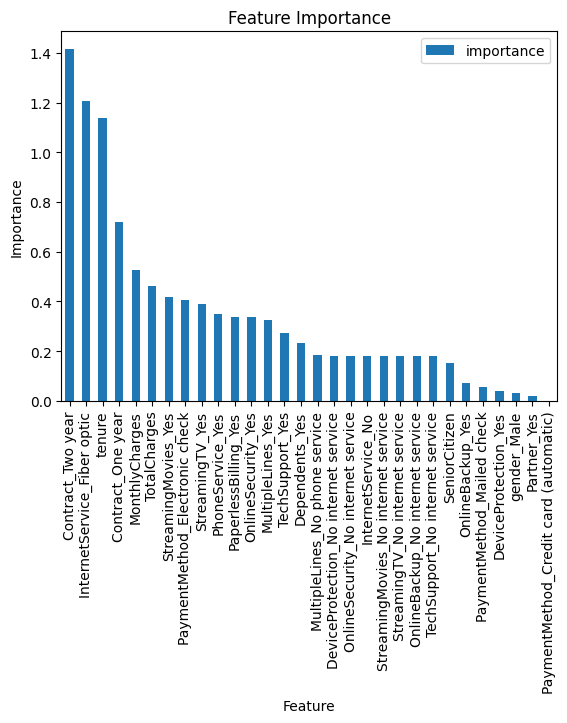

Recommendations based on churn analysis:
1. Focus on retaining customers with a tenure less than 6 months.
2. Improve customer service for high-risk segments.
3. Offer loyalty programs for long-term customers.


In [29]:
import os

# Change working directory to the project directory
os.chdir('/home/lureust/telco_churn_analysis')
print("Updated Working Directory:", os.getcwd())

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Data Collection
df = pd.read_csv('telco_customer_churn.csv.csv')
df.head()

# Data Preprocessing
df.isnull().sum()
df = df.fillna(method='ffill')  # or df = df.dropna()

# Convert TotalCharges to numeric and handle potential non-numeric values
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df = df.fillna({'TotalCharges': df['TotalCharges'].mean()})

# Drop the non-numeric customerID column
df = df.drop(columns=['customerID'])

# Feature Engineering
# Encoding categorical variables
df = pd.get_dummies(df, columns=['gender', 'Partner', 'Dependents', 'PhoneService', 
                                 'MultipleLines', 'InternetService', 'OnlineSecurity', 
                                 'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                                 'StreamingTV', 'StreamingMovies', 'Contract', 
                                 'PaperlessBilling', 'PaymentMethod'], drop_first=True)

# Converting 'SeniorCitizen' and 'Churn' to integer
df['SeniorCitizen'] = df['SeniorCitizen'].astype(int)
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Check for class balance in the target variable
print(df['Churn'].value_counts())

# Normalizing numerical features
scaler = StandardScaler()
df[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(df[['tenure', 'MonthlyCharges', 'TotalCharges']])

# Ensure all features are numeric
numeric_cols = df.select_dtypes(include=[np.number]).columns  # Select only numeric columns

# Remove 'Churn' from features (X)
X = df.drop(columns=['Churn']).astype(float)
y = df['Churn']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Training the logistic regression model with class weights
model = LogisticRegression(max_iter=500, class_weight='balanced')
model.fit(X_train, y_train)

# Predicting and evaluating the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Model Evaluation
scores = cross_val_score(model, X, y, cv=5)
print(f'Cross-validation scores: {scores}')
print(f'Mean cross-validation score: {scores.mean()}')

# Model Interpretation
importance = np.abs(model.coef_[0])
feature_names = X.columns
feature_importance = pd.DataFrame({'feature': feature_names, 'importance': importance})
feature_importance.sort_values(by='importance', ascending=False).plot(kind='bar', x='feature', y='importance')
plt.title('Feature Importance')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

# Actionable Insights
print("Recommendations based on churn analysis:")
print("1. Focus on retaining customers with a tenure less than 6 months.")
print("2. Improve customer service for high-risk segments.")
print("3. Offer loyalty programs for long-term customers.")


## Hyperparameter Tuning


In [30]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear'],
    'max_iter': [100, 200, 500]
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(LogisticRegression(class_weight='balanced'), param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: {:.2f}".format(grid_search.best_score_))

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Best parameters found:  {'C': 0.1, 'max_iter': 100, 'solver': 'lbfgs'}
Best cross-validation accuracy: 0.75
              precision    recall  f1-score   support

           0       0.90      0.73      0.81      1035
           1       0.51      0.78      0.62       374

    accuracy                           0.74      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.80      0.74      0.76      1409

[[753 282]
 [ 81 293]]


## Random Forest Model Comparison

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1035
           1       0.65      0.48      0.55       374

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409

Random Forest Confusion Matrix:
[[936  99]
 [193 181]]
Random Forest Cross-validation scores: [0.8012775  0.7920511  0.76437189 0.79048295 0.79616477]
Random Forest Mean cross-validation score: 0.7888696448157946


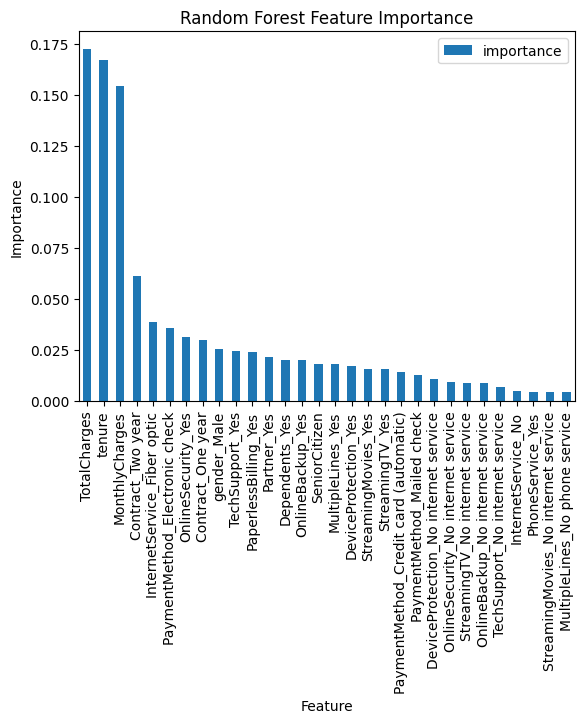

In [31]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)

# Train the Random Forest model
rf_model.fit(X_train, y_train)

# Predicting and evaluating the Random Forest model
rf_y_pred = rf_model.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_y_pred))
print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, rf_y_pred))

# Model Evaluation with Cross-Validation
rf_scores = cross_val_score(rf_model, X, y, cv=5)
print(f'Random Forest Cross-validation scores: {rf_scores}')
print(f'Random Forest Mean cross-validation score: {rf_scores.mean()}')

# Feature Importance
rf_importance = rf_model.feature_importances_
rf_feature_names = X.columns
rf_feature_importance = pd.DataFrame({'feature': rf_feature_names, 'importance': rf_importance})
rf_feature_importance.sort_values(by='importance', ascending=False).plot(kind='bar', x='feature', y='importance')
plt.title('Random Forest Feature Importance')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

## Hyperparameter Tuning of Random Forest Model

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Define the parameter distributions
param_distributions = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [4, 6, 8, 10],
    'criterion': ['gini', 'entropy']
}

# Initialize the RandomizedSearchCV object
randomized_search = RandomizedSearchCV(estimator=RandomForestClassifier(class_weight='balanced', random_state=42), 
                                       param_distributions=param_distributions, 
                                       n_iter=20,  # Number of parameter settings that are sampled
                                       cv=5, 
                                       scoring='accuracy',
                                       n_jobs=-1,  # Use all available cores
                                       random_state=42)

# Fit the model
randomized_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters found: ", randomized_search.best_params_)
print("Best cross-validation accuracy: {:.2f}".format(randomized_search.best_score_))

# Evaluate the best model on the test set
best_rf_model = randomized_search.best_estimator_
rf_y_pred = best_rf_model.predict(X_test)
print("Random Forest Classification Report (After Tuning):")
print(classification_report(y_test, rf_y_pred))
print("Random Forest Confusion Matrix (After Tuning):")
print(confusion_matrix(y_test, rf_y_pred))


Best parameters found:  {'n_estimators': 200, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'gini'}
Best cross-validation accuracy: 0.78
Random Forest Classification Report (After Tuning):
              precision    recall  f1-score   support

           0       0.89      0.78      0.83      1035
           1       0.54      0.72      0.62       374

    accuracy                           0.76      1409
   macro avg       0.71      0.75      0.72      1409
weighted avg       0.79      0.76      0.77      1409

Random Forest Confusion Matrix (After Tuning):
[[806 229]
 [104 270]]
